# Рубежный контроль №1
## Сухова М.А. ИУ5-65Б Вариант №17
Задача №3. Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

In [114]:
# импорт основных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
# загрузка датасета
from sklearn.datasets import load_iris

iris_dataset = load_iris()

### Анализ датасета

In [116]:
# наименования признаков
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [117]:
# значения целевого признака
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [119]:
target_dict = dict(zip(np.unique(iris_dataset.target), iris_dataset.target_names))
target_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [120]:
# dataset to pd.DataFrame
iris_df = pd.DataFrame(data=iris_dataset['data'], columns=iris_dataset['feature_names'])
iris_df['target'] = iris_dataset['target']
iris_df['target_name'] = [target_dict[i] for i in iris_dataset['target']]

In [121]:
# первые 5 строк
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [122]:
# типы данных
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
target_name           object
dtype: object

In [123]:
print(f"Строк: {iris_df.shape[0]}\nСтолбцов: {iris_df.shape[1]}")

Строк: 150
Столбцов: 6


In [124]:
# проверка наличия пропусков
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

(пропусков нет)

In [125]:
# описание количественных признаков
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Масштабирование данных

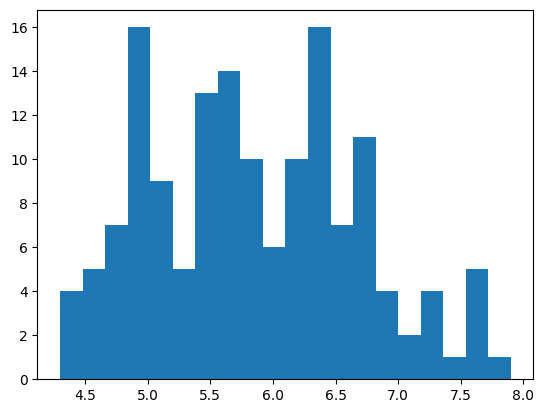

In [156]:
# изначальные значения в выбранном столбце
data = iris_df[['sepal length (cm)']]
# гистограмма данных
plt.hist(data, 20)
plt.show()

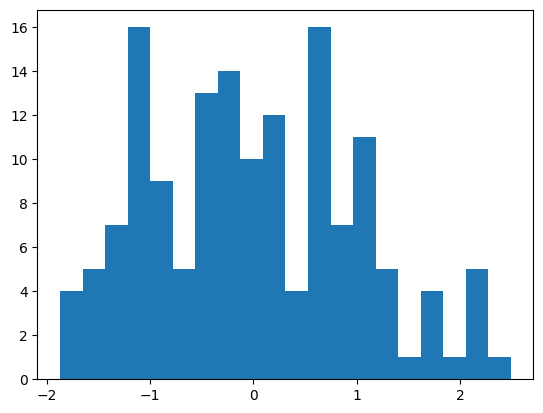

In [157]:
# на основе Z-оценки
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
scaled_df2 = stand.fit_transform(data)
plt.hist(scaled_df2, 20)
plt.show()

## Преобразование признаков

Для преобразования выберем единственный категориальный признак target_name.

In [161]:
# значения выбранного признака
print(*iris_df['target_name'].unique(), sep=", ")

setosa, versicolor, virginica


### 1. Label Encoding

In [131]:
# импорт класса для label encoding из sklearn
from sklearn.preprocessing import LabelEncoder

In [132]:
le = LabelEncoder()
enc_target1 = le.fit_transform(iris_df['target_name'])
# срез значений преобразованного признака
enc_target1[0:-1:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

### 2. One Hot Encoding

In [133]:
# импорт класса для one hot encoding из sklearn
from sklearn.preprocessing import OneHotEncoder

In [134]:
ohe = OneHotEncoder()
enc_target2 = ohe.fit_transform(iris_df[['target_name']])
# срез значений преобразованного признака
enc_target2.todense()[0:-1:10]

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

## Парные диаграммы

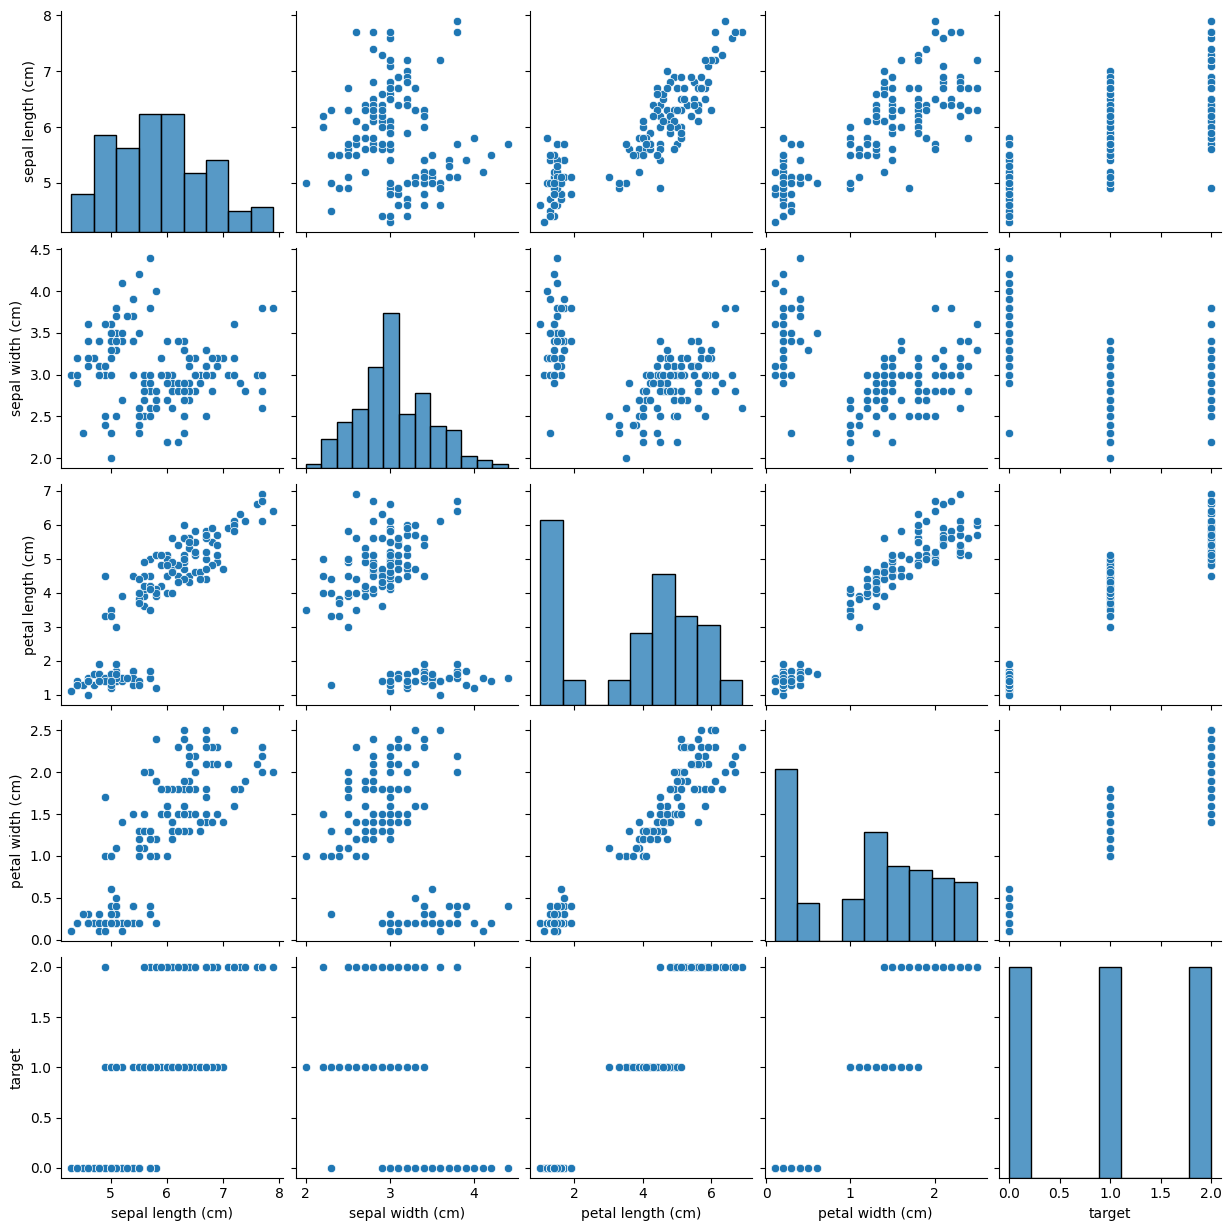

In [135]:
sns.pairplot(iris_df)

С группировкой по целевому признаку:

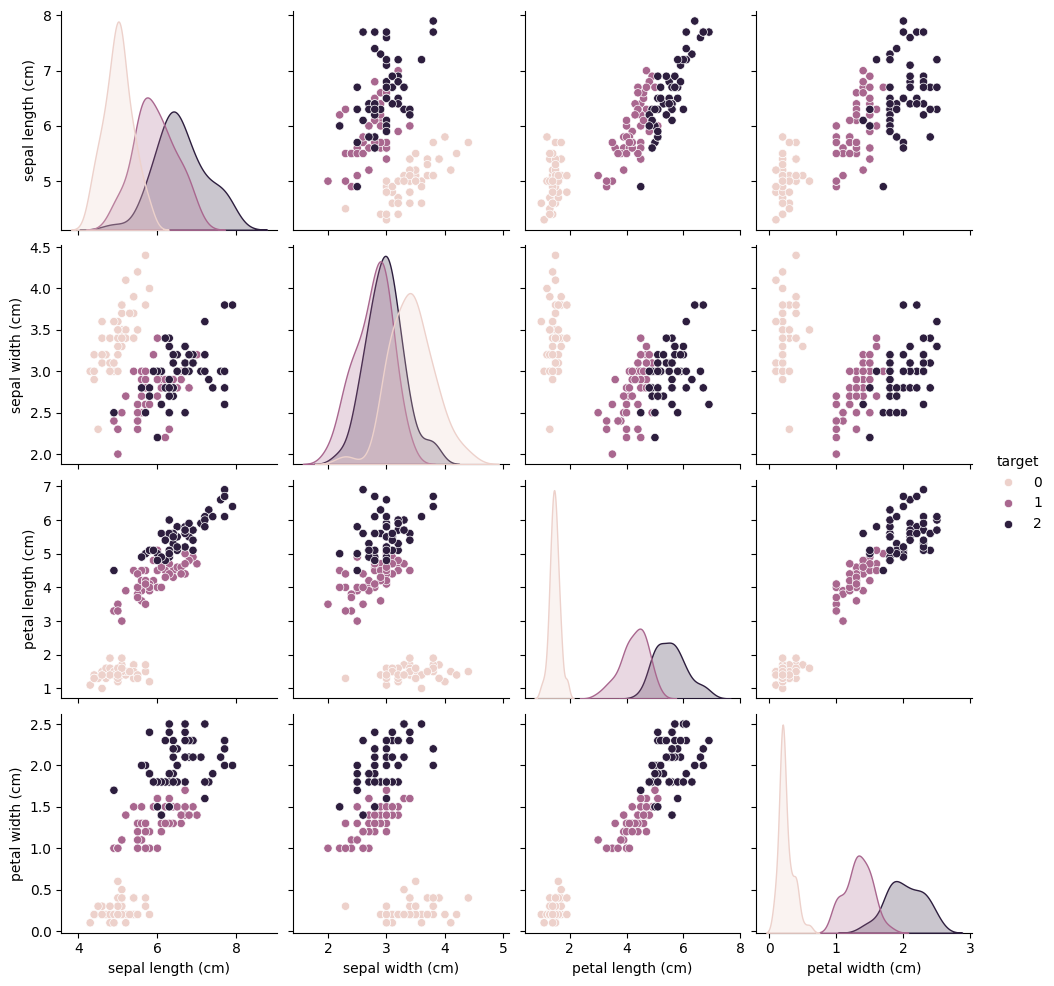

In [136]:
sns.pairplot(iris_df, hue="target")

На основе парных диаграмм можем сделать следующие выводы:
- Все признаки для каждого сорта ириса распределены нормально.
- Сорта 1 и 2 (versicolor и virginica) схожи между собой больше, чем ирисы сорта 0 (setosa).
- Для сорта 0 разброс значений признаков меньше по длине чашелистика и длине и ширине лепестка, чем для остальных.
- Существует прямая зависимость между длиной и шириной лепестка, длиной чашелистика и длиной лепестка, между остальными признаками зависимость выражена слабее.